# Dataset: [Kaggle - Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)



### 1. Importing Libraries and Setting Up the Environment

This initial cell is dedicated to setting up our analytical environment. We import all the essential Python libraries required for the project.

* **Data Manipulation:** We import `pandas` for handling our data in tables (DataFrames) and `numpy` for efficient numerical calculations.
* **Data Visualization:** `matplotlib` and `seaborn` are imported to create various plots and charts, which will help us explore the data and visualize our final clusters.
* **Machine Learning:** We import key components from `scikit-learn`, including `KMeans` for the clustering algorithm itself, and tools like `StandardScaler` and `LabelEncoder` for necessary data preprocessing.
* **Utilities:** Finally, we suppress unnecessary warnings for a cleaner output and use the `os` library to locate and print the file path of our dataset within the Kaggle environment.

In [9]:
# --- Core Data Handling and Numerical Libraries ---
import numpy as np  
import pandas as pd 
import datetime     # To work with date columns

# --- Data Visualization Libraries ---
import matplotlib.pyplot as plt 
from matplotlib import colors   
import seaborn as sns

# --- Scikit-Learn for Preprocessing and Modeling ---
from sklearn.preprocessing import LabelEncoder   
from sklearn.preprocessing import StandardScaler 

from sklearn.cluster import KMeans 

from sklearn import metrics 

# --- Utility Libraries ---
import warnings     # To handle warning messages
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore") # Suppress warnings for a cleaner notebook output

import os 

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


### 2. Loading and Inspecting the Data

Here, we load the `marketing_campaign.csv` dataset into a pandas DataFrame, specifying that the separator is a tab (`\t`). Immediately after loading, we use `.isnull().sum()` to perform a quick check for any missing values in each column. This helps us identify columns that will need cleaning, like the `Income` column in this case.

In [10]:

df = pd.read_csv("/kaggle/input/customer-personality-analysis/marketing_campaign.csv", sep = '\t')


df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### 3. Data Cleaning & Feature Engineering

This is a crucial preprocessing step where we clean the data and create new, more informative features to improve our model's performance. The actions taken are:

1.  **Handle Missing Data:** We start by removing any rows that contain missing values using `.dropna()`. This is a straightforward approach to ensure our dataset is complete.
2.  **Process Dates:** The `Dt_Customer` column is converted from text into a proper datetime format, which allows us to perform calculations like determining customer tenure.
3.  **Engineer New Features:** We create several new features to better capture customer characteristics:
    * `Total_Spend`: A single metric representing a customer's total expenditure.
    * `Age`: Calculated from the `Year_Birth`.
    * `Years_Customer`: The customer's tenure with the company.
    * `Children`: The total number of children in the household.
4.  **Encode Categorical Data:** Machine learning models require numerical input, so we convert the text-based `Education` and `Marital_Status` columns into numerical labels using `LabelEncoder`.

Finally, we use `.info()` and `.head()` to inspect the transformed DataFrame, confirming that our changes have been applied correctly and the data is ready for the next steps.

In [11]:
# --- 1.Data Cleaning ---
df = df.dropna()

# --- 2.Process Date ---

df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst = True)

# --- 3. Engineer new Features ---

# Create a new 'Total_Spend' feature by summing the values across the spending columns for each customer.
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spend'] = df[spending_cols].sum(axis=1)

# Create an 'Age' feature by subtracting the customer's birth year from a reference year (2025).
df['Age'] = 2025 - df['Year_Birth']

# Create a 'Years_Customer' feature to represent customer tenure.
df['Years_Customer'] = 2025 - df['Dt_Customer'].dt.year

# Create a 'Children' feature by summing the number of kids and teens at home.
df['Children'] = df['Kidhome'] + df['Teenhome']

# --- 4.Encoding Categorical Data ---
# Get a list of categorical columns that need to be converted to numbers based on our info()
categorical_cols = ['Education', 'Marital_Status']


for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# --- Final Inspection ---
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   int64         
 3   Marital_Status       2216 non-null   int64         
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Spend,Age,Years_Customer,Children
0,5524,1957,2,4,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,1617,68,13,0
1,2174,1954,2,4,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,27,71,11,2
2,4141,1965,2,5,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,776,60,12,0
3,6182,1984,2,5,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,53,41,11,1
4,5324,1981,4,3,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,422,44,11,1


### 4. Selecting Features for Clustering

In this step, we create a new, smaller DataFrame called `df_processed`. This DataFrame contains only the specific features that we've chosen to define our customer segments. 

By selecting a subset of the most relevant attributes (`Age`, `Income`, `Total_Spend`, etc.), we can build a more focused and meaningful clustering model that is tailored to identifying customer personalities.

In [12]:
# Create a list of the specific feature names we want to use for clustering.
features_for_clustering = [
    'Age', 'Education', 'Marital_Status', 'Income', 'Years_Customer', 'Total_Spend'
]

# Create a new copy 'df_processed' that contains only the selected columns from the original DataFrame.
df_processed = df[features_for_clustering]

df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2216 non-null   int64  
 1   Education       2216 non-null   int64  
 2   Marital_Status  2216 non-null   int64  
 3   Income          2216 non-null   float64
 4   Years_Customer  2216 non-null   int32  
 5   Total_Spend     2216 non-null   int64  
dtypes: float64(1), int32(1), int64(4)
memory usage: 112.5 KB


### 5. Scaling the Data

This cell performs one of the most critical preprocessing steps for clustering: **feature scaling**.

#### Why do we need to scale the data?
The K-Means algorithm works by measuring the distance between data points to form clusters. If our features are on vastly different scales (e.g., `Income` in the tens of thousands vs. `Age` in the tens), the feature with the larger scale will completely dominate the distance calculation. The algorithm would incorrectly assume that differences in income are far more important than differences in age, simply because the numbers are bigger.

To prevent this bias, we use `StandardScaler`. This technique transforms each feature so that it has a **mean of 0 and a standard deviation of 1**. By putting all features on the same common scale, we ensure that each one contributes equally to the clustering process, leading to more accurate and meaningful customer segments.

In [13]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(df_processed)

print("Scaling data succesfully")

Scaling data succesfully


### 6. Finding the Optimal Number of Clusters (Elbow Method)

A key challenge in K-Means clustering is deciding on the right number of clusters (`k`). The **Elbow Method** is a popular technique used to find this optimal value.

The method works by running the K-Means algorithm multiple times with a different number of clusters for each run (e.g., from 1 to 10). For each `k`, we calculate the **inertia**, which is the sum of squared distances of samples to their nearest cluster center.

We then plot the inertia for each value of `k`. The resulting graph typically looks like an arm, and the "elbow" of the arm represents the point of diminishing returns. This is the point where adding more clusters no longer provides a significant reduction in inertia. This "elbow" is considered the best and most natural number of clusters for the dataset.

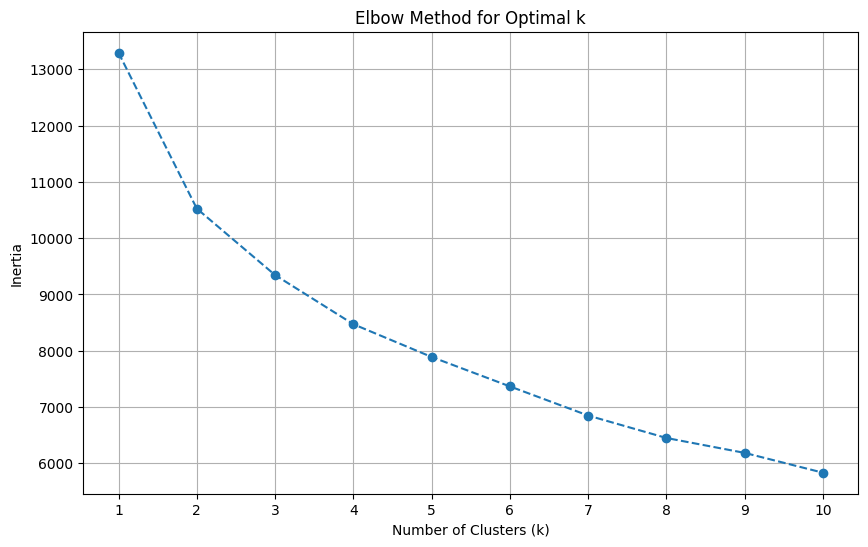

In [14]:
# Create an empty list to store the inertia values for each k.
inertia = []
# Define the range of k values to test (from 1 to 10 clusters).
k_range = range(1, 11)

# Loop through each possible number of clusters.
for k in k_range:
    # 'random_state=42' ensures reproducibility.
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# --- Plotting the Elbow Method Graph ---

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')


plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')


plt.xticks(k_range)
# Add a grid for better readability.
plt.grid(True)
# Display the plot.
plt.show()

### 7. Building the Final Model and Analyzing Clusters

Based on the grapg of the Elbow Method, we believe that 4 is the most optimal k value for our model.

We then initialize the `KMeans` algorithm with `n_clusters=4` and fit it to our scaled data. The model then assigns each customer to one of the four clusters.

The most important part of this step is the analysis. We add the cluster labels back to our original DataFrame, which allows us to investigate the characteristics of each segment. By grouping the data by the new `Cluster` label and calculating the average `Age`, `Income`, `Total_Spend`, and `Children`, we can have a first look at our Cluster

In [15]:
# Set the optimal number of clusters to 4, based on the Elbow Method analysis.
optimal_k = 4

# --- Model Training ---
# Initialize the final KMeans model with the optimal number of clusters.
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# --- Assigning Cluster Labels ---
df['Cluster'] = kmeans.labels_


# --- Analyzing the Clusters ---
# Group the DataFrame by the new 'Cluster' column.
# For each cluster, calculate the mean (average) value of the key features.
# .round(2) is used to make the output table easier to read.
cluster_analysis = df.groupby('Cluster')[['Age', 'Income', 'Total_Spend', 'Years_Customer', 'Children']].mean().round(2)

print("\n--- Cluster Analysis (Mean Values) ---")
print(cluster_analysis)


--- Cluster Analysis (Mean Values) ---
           Age    Income  Total_Spend  Years_Customer  Children
Cluster                                                        
0        64.75  52441.47       516.69           11.91      1.09
1        55.87  76276.11      1370.43           12.13      0.44
2        58.66  44510.58       260.17           11.68      1.28
3        47.00  33040.42       175.90           12.13      1.06


### 8. Analysis of Customer Segments

The K-Means algorithm has successfully segmented our customers into four distinct groups. By analyzing the average values of key features for each cluster, we can create a clear profile or "personality" for each segment.

* **Cluster 0: The Established & Moderate Spenders**
    * This group has the **oldest** average age (around 65).
    * They have a solid, upper-middle income and are the **second-highest spenders**.

* **Cluster 1: The High-Value Power Spenders**
    * This is our **most valuable segment**. They have the **highest income** and by far the **highest total spending**.
    * They also have the fewest children on average, suggesting they have more disposable income.

* **Cluster 2: The Cautious Family Group**
    * This group is characterized by having the **most children** on average.
    * They have a lower-middle income and their spending is low, likely because their budget is more focused on family needs.

* **Cluster 3: The Young & Low-Income Group**
    * This segment is the **youngest** on average (around 47).
    * They have the **lowest income** and the **lowest total spending** of all the groups.


### 9. Visualizing Cluster Distribution

This plot provides a simple but important overview of our results. We use `seaborn.countplot` to create a bar chart that shows the total number of customers belonging to each of the four identified clusters.

This visualization helps us quickly understand the relative size and distribution of each customer segment, confirming that the algorithm has created balanced and meaningful groups.

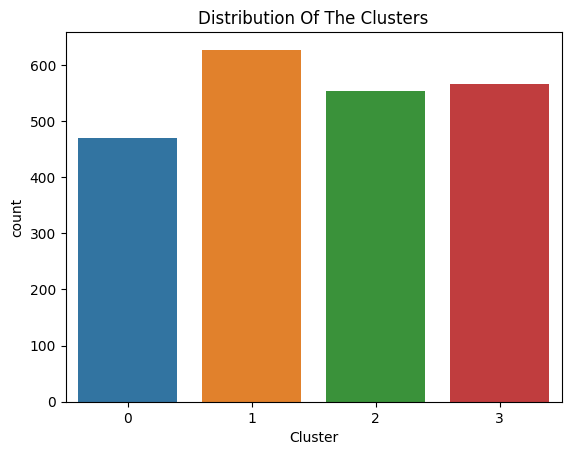

In [16]:

# A palette with 4 highly distinguishable colors
pal = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

# Create a count plot using seaborn to visualize the number of customers in each cluster.
sns.countplot(x=df["Cluster"], palette=pal)

plt.title("Distribution Of The Clusters")

plt.show()

### Analysis of Cluster Distribution

This bar chart shows the number of customers in each of the four segments identified by the K-Means algorithm.

* **Cluster 1** is the largest segment, containing over 600 customers.
* **Clusters 2 and 3** are of a similar, substantial size, each with over 550 customers.
* **Cluster 0** is the smallest segment, with just under 500 customers.

The distribution is relatively balanced, with no single cluster being excessively large or small. This indicates that the algorithm has successfully partitioned the customers into meaningful and well-proportioned groups.

### 10. Deeper Dive into Cluster Characteristics

Now that we have created our customer segments and understand their high-level profiles, we will generate a series of charts to gain deeper insights. The following visualizations will explore the spending habits, purchasing behaviors, and campaign responses of each cluster, helping us to build a more complete picture of each customer personality.

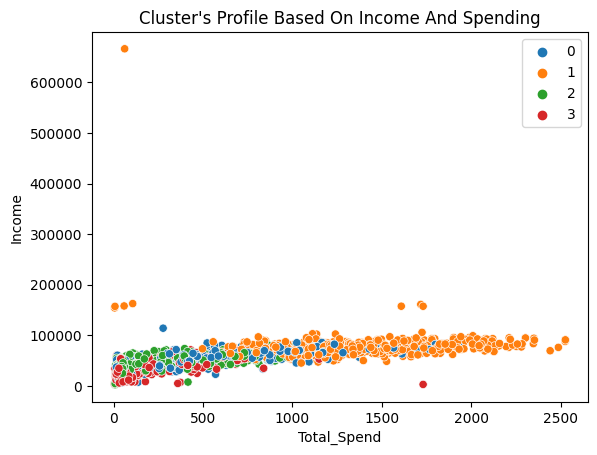

In [17]:
pl = sns.scatterplot(data = df,x=df["Total_Spend"], y=df["Income"],hue=df["Cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

### Analysis of Cluster Profiles by Income and Spending

This scatter plot provides a blended visualization of the financial profiles of our four customer segments.

* **Cluster 1:** This group is clearly defined by having both the **highest income** and the **highest total spending**. They form a distinct, high-value segment that is crucial to the business.

* **Cluster 2:** This cluster represents customers with **moderate income** and **moderate spending**. They are a solid, middle-ground segment.

* **Cluster 3:** This segment has **low income** and correspondingly **low total spending**. They are the most budget-conscious group.

* **Cluster 0:** This group is interesting as they have **low-to-moderate income** but their spending is also quite low, overlapping significantly with Cluster 3.

This plot is not the best to look at so we will be going for deeper analysis

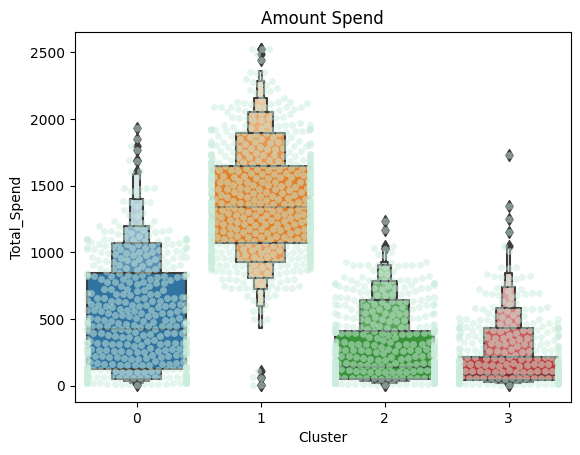

In [18]:
plt.figure()
sns.swarmplot(x=df["Cluster"], y=df["Total_Spend"], color= "#CBEDDD", alpha=0.5 )
sns.boxenplot(x=df["Cluster"], y=df["Total_Spend"], palette=pal)

plt.title("Amount Spend")
plt.show()

### Analysis of Total Spending Across Clusters

This plot provides a detailed look at the distribution of `Total_Spend` for each customer segment

* **Cluster 0:** This segment shows the **second-highest spending**, with a median spend around 500. The distribution is dense in the lower-to-mid range, reinforcing their profile as consistent, moderate spenders.

* **Cluster 1:** This group clearly stands out with the **highest and widest range of spending**. Their median spending is significantly higher than all other groups, and the distribution shows a large concentration of high-value customers. The outliers at the top further emphasize their status as the premium segment.

* **Clusters 2 and 3:** These two groups have **very low and similar spending patterns**. Their median spend is the lowest, and the vast majority of customers in these segments are concentrated at the bottom of the spending scale. This confirms their budget-conscious and price-sensitive nature.

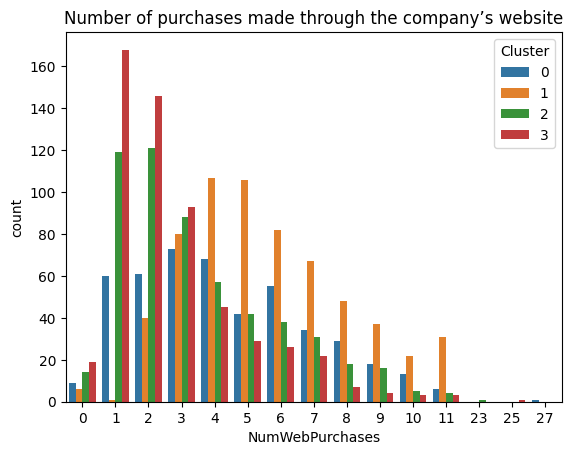

In [19]:

sns.countplot(x=df["NumWebPurchases"],hue=df["Cluster"], palette= pal)
plt.title("Number of purchases made through the company’s website")
plt.show()

### Analysis of Web Purchases


* **Cluster 0 (Blue):** This group is the least active online. While they make purchases across various frequencies, their highest concentration is at the lower end, particularly at **2-3 web purchases**.

* **Cluster 1 (Orange):** This group is clearly the most active online segment. They have a broad distribution across a higher number of web purchases, with significant counts from **4 to 8 purchases**. This group is comfortable and highly engaged with the company's website.

* **Cluster 2 (Green) & Cluster 3 (Red):** These two groups show very similar online behavior, peaking at **1 to 3 web purchases**. They shop online but are significantly less active than the high-value Cluster 1.


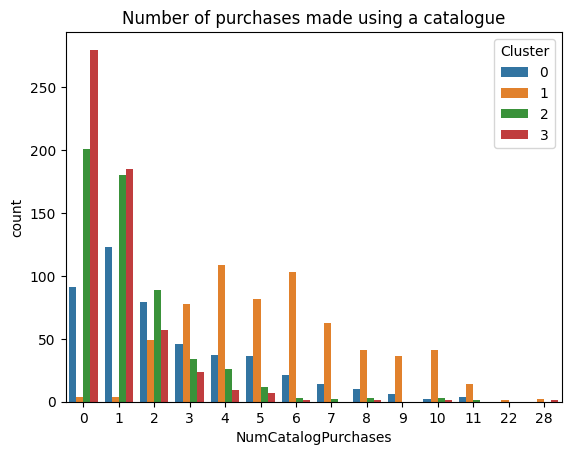

In [20]:
sns.countplot(x = df['NumCatalogPurchases'], hue = df['Cluster'], palette = pal)
plt.title("Number of purchases made using a catalogue")

plt.show()

### Analysis of Catalog Purchases

* **Cluster 0 (Blue):** This group shows moderate engagement with catalogs, with most of their activity concentrated in the 1-4 purchase range. They use this channel, but far less than Cluster 1.

* **Cluster 1 (Orange):** This segment is clearly the **dominant catalog shopper**. They are the only group with a significant number of purchases across the entire range, from 2 to 10 catalog purchases. This channel is a key part of their purchasing behavior.


* **Cluster 2 (Green) & Cluster 3 (Red):** These two segments show almost **no interest in catalog purchases**. The vast majority of customers in these groups have made barely any purchases through this channel, indicating it is not an effective way to reach them.

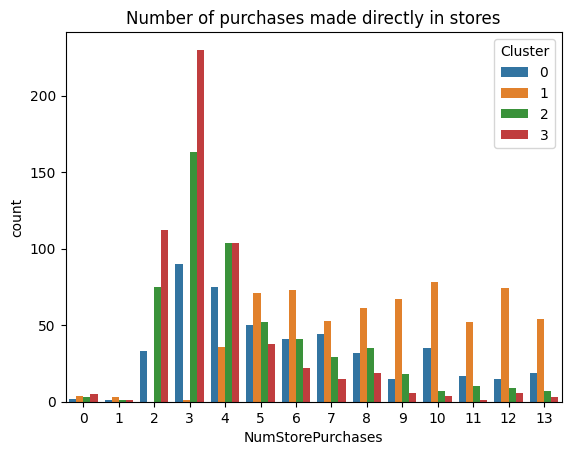

In [21]:
sns.countplot(x = df['NumStorePurchases'], hue = df['Cluster'], palette = pal)
plt.title("Number of purchases made directly in stores")

plt.show()

### Analysis of In-Store Purchases

* **Cluster 0 (Blue):** This group represents a moderate middle ground. They shop in-store more frequently than Clusters 2 and 3, with their activity peaking around **3 to 5 purchases**, but they are not as active as the high-frequency Cluster 1.

* **Cluster 1 (Orange):** This segment is the most active in physical stores. They exhibit a broad and high frequency of purchases, with significant activity in the **5 to 13 purchases** range. This indicates a strong preference for the traditional retail experience.

* **Cluster 3 (Red) & Cluster 2 (Green):** These two groups are primarily low-frequency in-store shoppers. Their purchasing behavior is heavily concentrated at the lower end, with a very sharp peak at just **3 store purchases**.



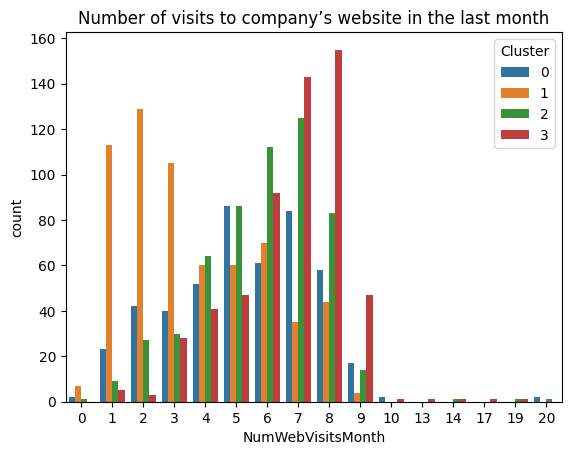

In [22]:
sns.countplot(x = df['NumWebVisitsMonth'], hue = df['Cluster'], palette = pal)
plt.title("Number of visits to company’s website in the last month")

plt.show()

### Analysis of Website Visits

* **Cluster 0 (Blue):** The moderate-spending group shows moderate browsing behavior, falling between the other segments with a peak around **5 to 7 visits**.

* **Cluster 1 (Orange):** The highest-spending group visits the website the **least**. Their activity is heavily concentrated at the low end, with most making only **1 or 2 visits** per month. This suggests they may be decisive buyers who don't need to browse extensively.

* **Cluster 3 (Red) & Cluster 2 (Green):** The lowest-spending segments are the **most frequent browsers**. Their visits peak significantly higher, around **6 to 8 times** per month. They are likely searching for information, comparing products, or waiting for promotions before making a purchase.

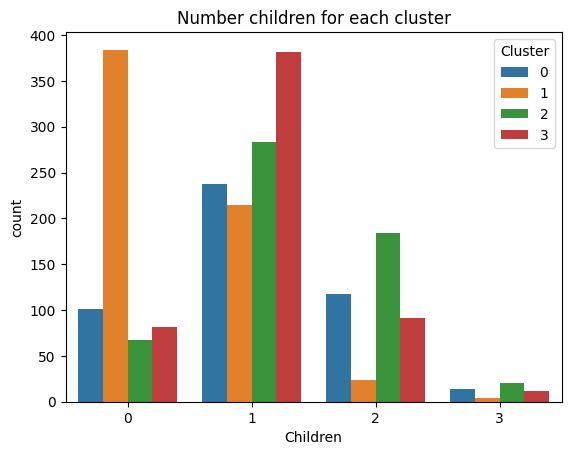

In [27]:
sns.countplot(x = df['Children'], hue = df['Cluster'], palette = pal)
plt.title("Number children for each cluster")

plt.show()

### Analysis of Household Composition (Number of Children)

* **Cluster 0 (Blue):** This segment is also largely composed of families with **one child**, though they have a more even distribution than Cluster 3, with a notable number of customers having zero or two children as well.
  
* **Cluster 1 (Orange):** This segment is overwhelmingly composed of customers with **zero children**. This strongly supports their profile as the highest spenders, as they likely have significantly more disposable income.

* **Cluster 2 (Green):** This segment represents the largest families, with a high concentration of customers having **two children**.

* **Cluster 3 (Red):** This group is predominantly made up of families with **one child**.

This analysis is key to understanding the different life stages of our customer segments and how family obligations may influence their spending habits.

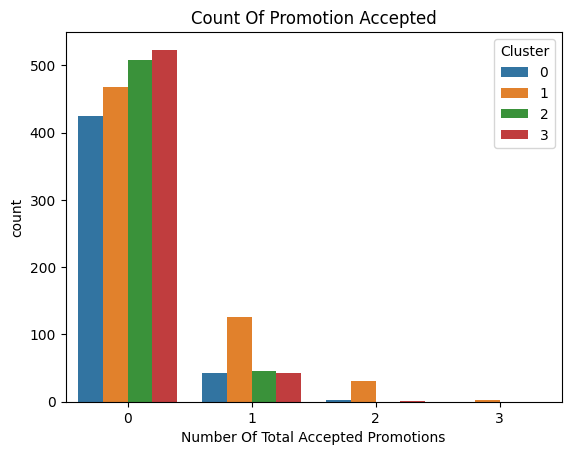

In [24]:
df['Total_Promos'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] 
+ df['AcceptedCmp4'] + df['AcceptedCmp5']

sns.countplot(x=df["Total_Promos"],hue=df["Cluster"], palette= pal)
plt.title("Count Of Promotion Accepted")
plt.xlabel("Number Of Total Accepted Promotions")
plt.show()

### Analysis of Promotion Acceptance

* **Cluster 1 (Orange):** This high-value segment is the **most likely to accept a promotion**. They are the dominant group for accepting at least one campaign and are also the most likely to accept two or more.

* **Clusters 0, 2, and 3 (Blue, Green, Red):** These three groups show very similar behavior. The overwhelming majority of customers in these segments have **accepted zero promotions**. This indicates a general unresponsiveness to the marketing campaigns offered.

This insight is crucial for marketing strategy. While Cluster 1 is highly engaged with promotions, a different approach is clearly needed to activate the other, larger customer segments.

## Final Conclussion

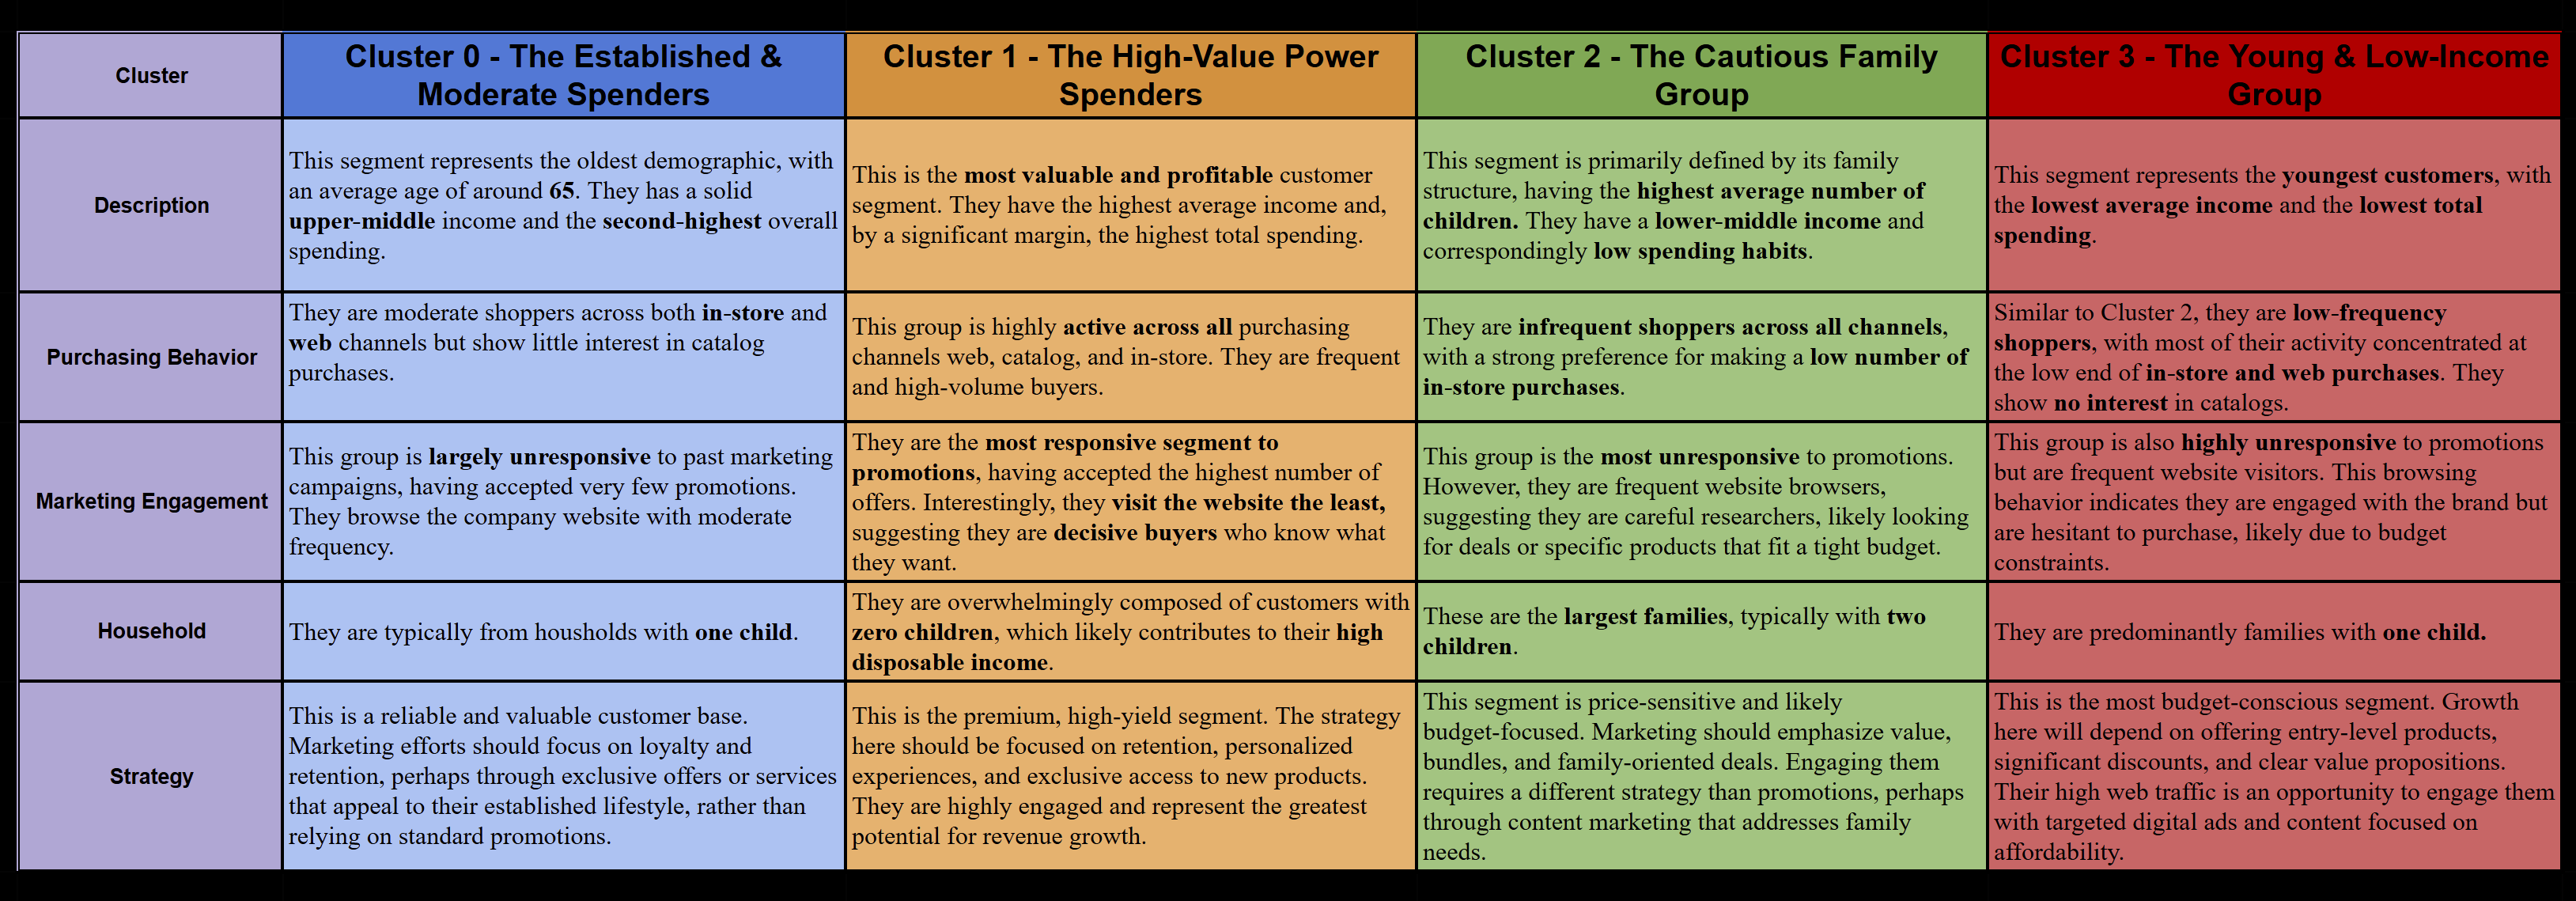
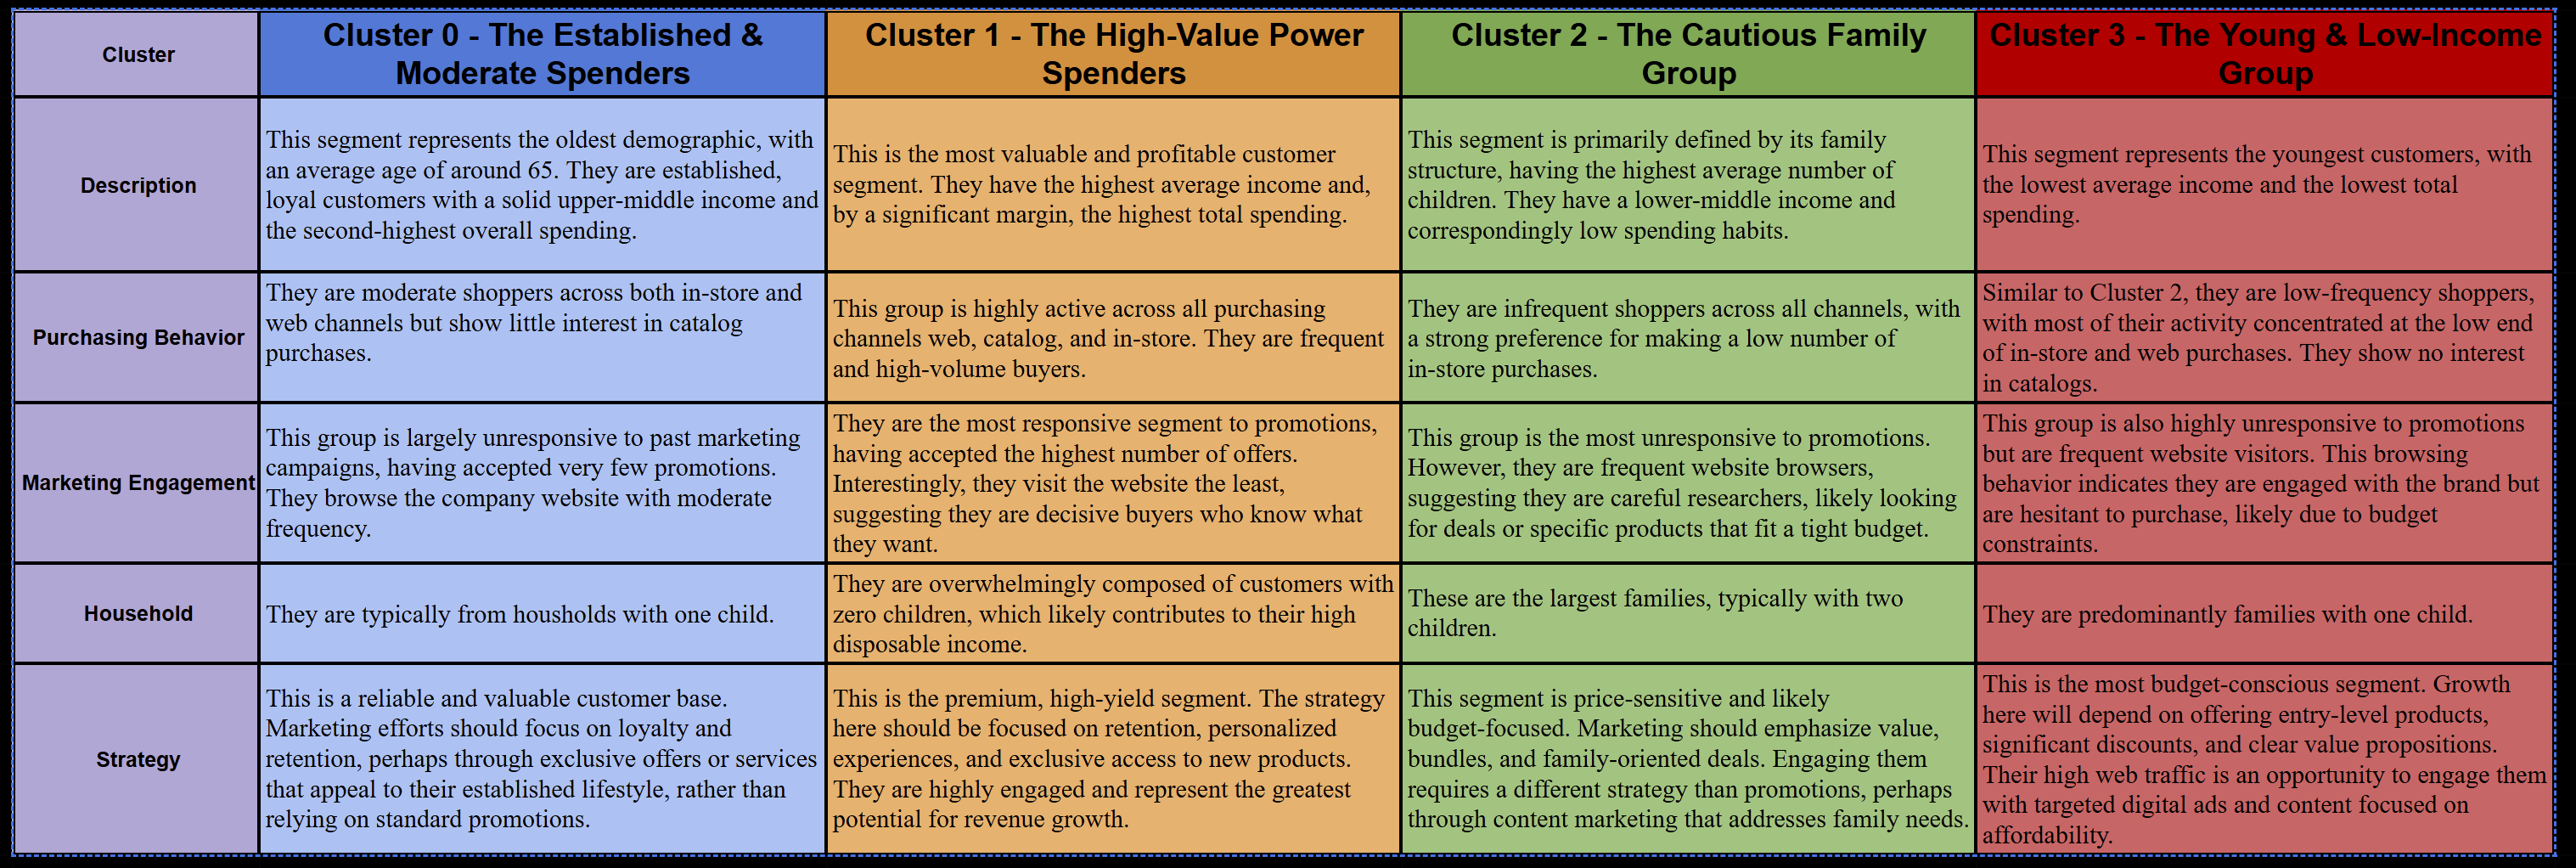